In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

### 합성곱 신경망 만들기

In [3]:
model = keras.Sequential() # 순차적인 레이어(keras.layers.~~)를 더하는(add) 형태로 구성되는 모델

In [4]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))

In [5]:
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

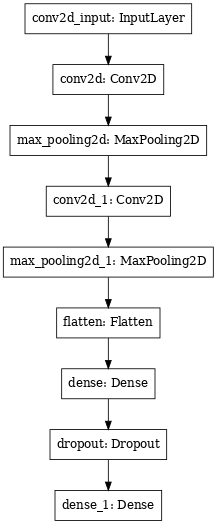

In [9]:
keras.utils.plot_model(model, dpi=60)

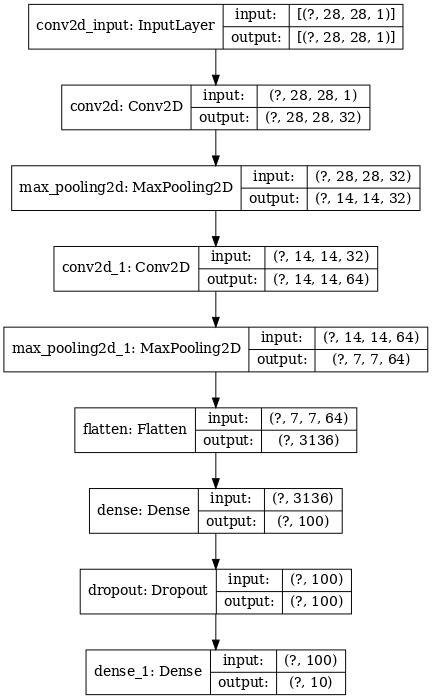

In [10]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=70)

### 모델컴파일과 훈련

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5231 - accuracy: 0.8123 - val_loss: 0.3265 - val_accuracy: 0.8814
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3502 - accuracy: 0.8749 - val_loss: 0.2867 - val_accuracy: 0.8939
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3010 - accuracy: 0.8916 - val_loss: 0.2522 - val_accuracy: 0.9071
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9013 - val_loss: 0.2468 - val_accuracy: 0.9088
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2406 - accuracy: 0.9131 - val_loss: 0.2324 - val_accuracy: 0.9151
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2236 - accuracy: 0.9174 - val_loss: 0.2321 - val_accuracy: 0.9126
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2051 - accuracy: 0.9231 - val_loss: 0.2299 - val_accuracy:

In [12]:
import matplotlib.pyplot as plt

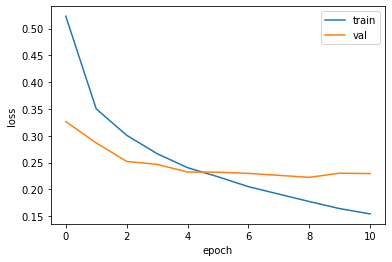

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2225 - accuracy: 0.9193


[0.2224743515253067, 0.9192500114440918]

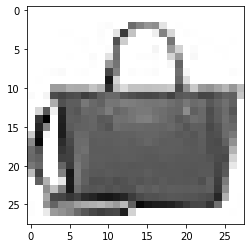

In [15]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [16]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[2.14143743e-17 5.37828576e-29 6.20768030e-21 1.89161957e-20
  1.28920570e-19 1.12366274e-20 2.06212624e-19 5.27271806e-19
  1.00000000e+00 8.16890534e-21]]


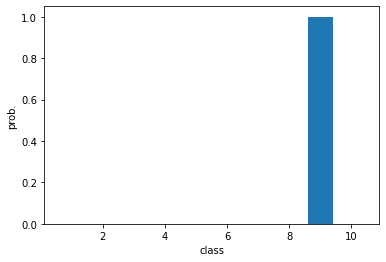

In [17]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [18]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [19]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [20]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [21]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2418 - accuracy: 0.9171


[0.24181818962097168, 0.9171000123023987]